# Neural Networks in Keras


First of all, we must import the tensorflow library, which you can install by using ``pip install tensorflow `` in one of the notebook cells.

In [1]:
import tensorflow as tf

In order to have a first glance at what TensorFlow provides, we will have a look at the dataset **MNIST**, which is a part of the TensorFlow libray:

In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

 As you can see, in order to load the data, we have split the dataset into two tuples which contain the train data and the test data. Data labeled as x are ndarrays constituted by each of the images that comprise the MNIST dataset (if you are not familiar with it, you should know that these images are just handwritten numbers from 0 to 9), while data labeled as y is the label for each of the images (i.e. a number from 0 to 9). Let's have a look at one of the images:

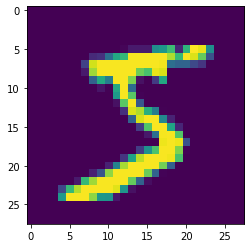

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

And now we can check its label, which should be a 5:

In [4]:
print(y_train[0])

5


Each image is given as a 28x28 matrix, but in order to work with it, we will reshape it as an array with 784 elements. Since we have 60000 images, we will end up with a 60000(10000 for the test) x 784 matrix. The labels will also be reshaped, and instead of giving the label as a number from 0 to 9, we will now have an array of length 9 for each image whose only non-zero element is in the position of the label assigned to that image (i.e., if the previous label was a five, the 5th element of the array will be a 1).

In [5]:
#Scaling from 0 to 1

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255 
x_test = x_test/255

#Reshaping

x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

#Creating new y-labels

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train,num_classes=10) #function inside tensorflow that does the work for us
y_test = to_categorical(y_test,num_classes=10)


## Building Our First Model

We will start with a Sequential model, which is "a plain stack of layers where each layer has exactly one input tensor and one output tensor" (https://keras.io/guides/sequential_model/).

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()

In order to add layers to the model, we use the following:

In [7]:
model.add(layers.Dense(10,input_shape=(784,),activation="sigmoid",name="dense_1"))
model.add(layers.Dense(10,activation="softmax",name="dense_2"))

As you can see, we have added two layers with 10 densely connected neurons/nodes each (that is, all the neurons of one layer are connected with all the neurons of the other one. Apart from this, it is important to notice that the layers have different activation functions, which we will probably cover later. In the first layer, we have also explicitly stated the input shape. Keras library automatically deduces the tensor shapes between layers, so it is not necessary to provide this information to the following layers. In the end, we have ten neurons associated to each of the 10 numbers. These neurons will return the probabilities that an image is a certain number (i.e., the first neuron will give us the probability that a given image is a 0).

Before continuing with the model training, I would like to introduce a function which is very useful to have a look at our model architecture, which is `summary()`:

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


This function provides us with the essential information of the architecture. We can see that in order to work with this neural network, we need 7960 parameters ($784*10$ from the weights and 10 from the bias of the first layer and $10*10$ from the weights and 10 from the bias of the second one). 

Now that we have done this, it is time to configure the learning process of our model. This is done with the method `compile()` (https://keras.io/api/models/model_training_apis/). In this case, we will choose the *stochastic gradient descent* as the optimizer, the *categorical cross entropy* as the loss function and the accuracy as metric. For now, we will not explain what these terms mean, but the first two are basically the parameters that define how our neural networks learns and the metrics are ways of analyzing how good our model is.

In [9]:
model.compile(loss="categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

## Training The Model

Once we have established the kind of model we want to work with, all we have to do to train it is call `fit()` and add x_train and y_train as parameters. As you can see, there is another parameter called *epochs*, which is the number of times we will use the data in the learning process (we will cover this in future notebooks). In essence, what we are doing here is passing the data (x_train) through our neural network and comparing its outcome to the real labels (y_train). Once this is done, the loss function is calculated in order to adjust the model parameters. This process is repeated as many times as we have requested with the *epochs* parameter:

In [10]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 721us/step - loss: 2.1136 - accuracy: 0.3303
Epoch 2/5
1875/1875 [==============================] - 1s 748us/step - loss: 1.4113 - accuracy: 0.7090
Epoch 3/5
1875/1875 [==============================] - 1s 747us/step - loss: 1.0482 - accuracy: 0.7693
Epoch 4/5
1875/1875 [==============================] - 1s 723us/step - loss: 0.8504 - accuracy: 0.8092
Epoch 5/5
1875/1875 [==============================] - 1s 719us/step - loss: 0.7196 - accuracy: 0.8401


## Model Evaluation

Now that we have trained the model, it is time to evaluate it. In order to do so, we can use `evaluate()`. This method will return the loss function and the accuracy of the model when using the test dataset:

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 653us/step - loss: 0.6394 - accuracy: 0.8607


This is not the only way to evaluate or model, and it is actually pretty simple. A very common way to study the performance of a model is the use of confusion matrices (https://en.wikipedia.org/wiki/Confusion_matrix , the link only covers the binary case, but it is easy to generalize). Below, you can find the code:

In [50]:
y_pred = model.predict_classes(x_test)#if we use predict(), we would obtain the scores of the regression. This returns the class
y_test_classes = [np.argmax(y, axis=None, out=None) for y in y_test] #we reverse the categorical 


/Users/JackeyTrey/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


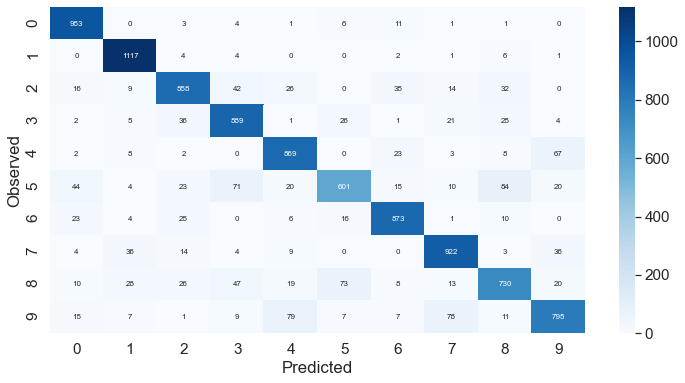

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_classes,y_pred)

df_cm = pd.DataFrame(cm) #index and column are given as 0-9 by default in DataFrame, so we don't need to add it 

plt.figure(figsize=(12,6))
sn.heatmap(df_cm, annot=True,fmt="d",  cmap=plt.cm.Blues, annot_kws={"size": 8}) # font size
plt.xlabel('Predicted')

plt.ylabel('Observed')

plt.show()

## Test accuracy vs epochs. Overfitting

Let's see how the test accuracy changes with the number of epochs used in the fit, up to 100 epochs.

In [24]:
import numpy as np 

model_2 = keras.Sequential()
model_2.add(layers.Dense(10,input_shape=(784,),activation="sigmoid",name="dense_1"))
model_2.add(layers.Dense(10,activation="softmax",name="dense_2"))
model_2.compile(loss="categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

test_loss = []
test_acc = [] 
for i in range(1,100):
             model_2.fit(x_train,y_train,epochs=1)
             loss_aux, acc_aux = model_2.evaluate(x_test, y_test)
             test_loss.append(loss_aux)
             test_acc.append(acc_aux)



1875/1875 [==============================] - 2s 816us/step - loss: 0.2808 - accuracy: 0.9216


313/313 [==============================] - 0s 629us/step - loss: 0.2529 - accuracy: 0.9258


313/313 [==============================] - 0s 633us/step - loss: 0.2485 - accuracy: 0.9267


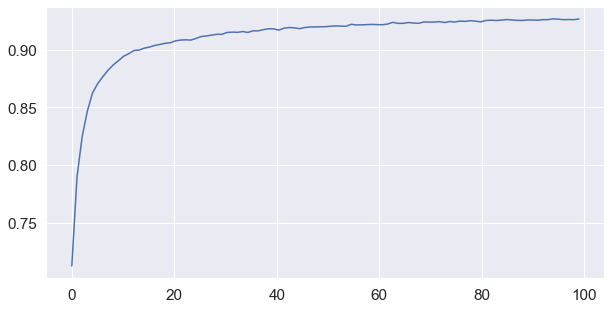

In [65]:
epochs = np.linspace(0,99,99)
plt.figure(figsize=(10,5))
plt.plot(epochs,test_acc)


As you can see, the accuracy increases until it reaches a limit (around 0.92), where it does not seem to improve anymore, or the rate decreases quickly. We can see that it does not really make a difference to use, for example 40 epochs, or 100 as the difference in accuracy is not significant and fluctuacions in the model start to prevail (in order to see these, have a look at the accuracy values above the graph).

## Model Predictions

Now we will learn how to ask for predictions with our model. In the Model Evaluation section we have already seen the method `predict_classes()`, which returns the predicted label for each image. We will now use `predict()`, which returns an array with the probabilities of each possible label for a given imagen. If we would like to obtain the label with the highest probability (which is basically what we obtain with `predict_classes()`, we can use `np.argmax()`:

In [71]:
predictions = model.predict(x_test)

predictions_max = np.argmax(predictions,axis=1) #don't forget the axis=1

And now we can check a random image:

In [72]:
predictions_max[2]

1

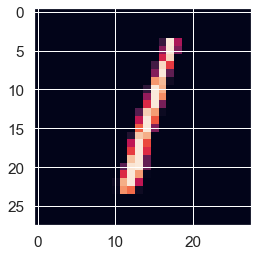

In [79]:
x_test_try = x_test.reshape(10000,28,28) #we have to reshape again. We could have saved the reshaping in a second variable before


plt.imshow(x_test_try[2])

## References

Apart from the links that you might find throughout the notebook, most of the work done here is based on the book *Python Deep Learning* from Jordi Torres (https://torres.ai/python-deep-learning/)